<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Web-scape-The-numbers-(1)" data-toc-modified-id="Web-scape-The-numbers-(1)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Web scape The numbers (1)</a></span></li><li><span><a href="#Web--scape-The-numbers-(2)" data-toc-modified-id="Web--scape-The-numbers-(2)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Web  scape The numbers (2)</a></span></li><li><span><a href="#THE-MOVIE-DATABASE---API" data-toc-modified-id="THE-MOVIE-DATABASE---API-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>THE MOVIE DATABASE - API</a></span></li><li><span><a href="#ABOUT-MOVIES" data-toc-modified-id="ABOUT-MOVIES-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ABOUT MOVIES</a></span></li><li><span><a href="#less-movies" data-toc-modified-id="less-movies-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>less movies</a></span></li><li><span><a href="#Get-the-primary-information-about-a-movie." data-toc-modified-id="Get-the-primary-information-about-a-movie.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Get the primary information about a movie.</a></span></li><li><span><a href="#Search-for-movies-by-title" data-toc-modified-id="Search-for-movies-by-title-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Search for movies by title</a></span></li><li><span><a href="#SÉRIES-POPULAR" data-toc-modified-id="SÉRIES-POPULAR-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>SÉRIES POPULAR</a></span></li><li><span><a href="#Concat-three-datasets-(Web1-+Web2+-API(TMDb)=-df-+-df0-DB" data-toc-modified-id="Concat-three-datasets-(Web1-+Web2+-API(TMDb)=-df-+-df0-DB-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Concat three datasets (Web1 +Web2+ API(TMDb)= df + df0 DB</a></span></li><li><span><a href="#USER-OTHER-DATAFRAME---CSV" data-toc-modified-id="USER-OTHER-DATAFRAME---CSV-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>USER OTHER DATAFRAME - CSV</a></span></li><li><span><a href="#Concat-datasets-(WEB1-e-2-+-API+-CSV)=-df-+-df0-+-tv_shows-(Data-SET)" data-toc-modified-id="Concat-datasets-(WEB1-e-2-+-API+-CSV)=-df-+-df0-+-tv_shows-(Data-SET)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Concat datasets (WEB1 e 2 + API+ CSV)= df + df0 + tv_shows (Data SET)</a></span></li></ul></div>

In [1]:
import pandas as pd
import tqdm
import numpy as np

import requests
from bs4 import BeautifulSoup

import omdb
import json

import matplotlib.pyplot as plt 
import seaborn as sb

In [74]:
!pip install omdb

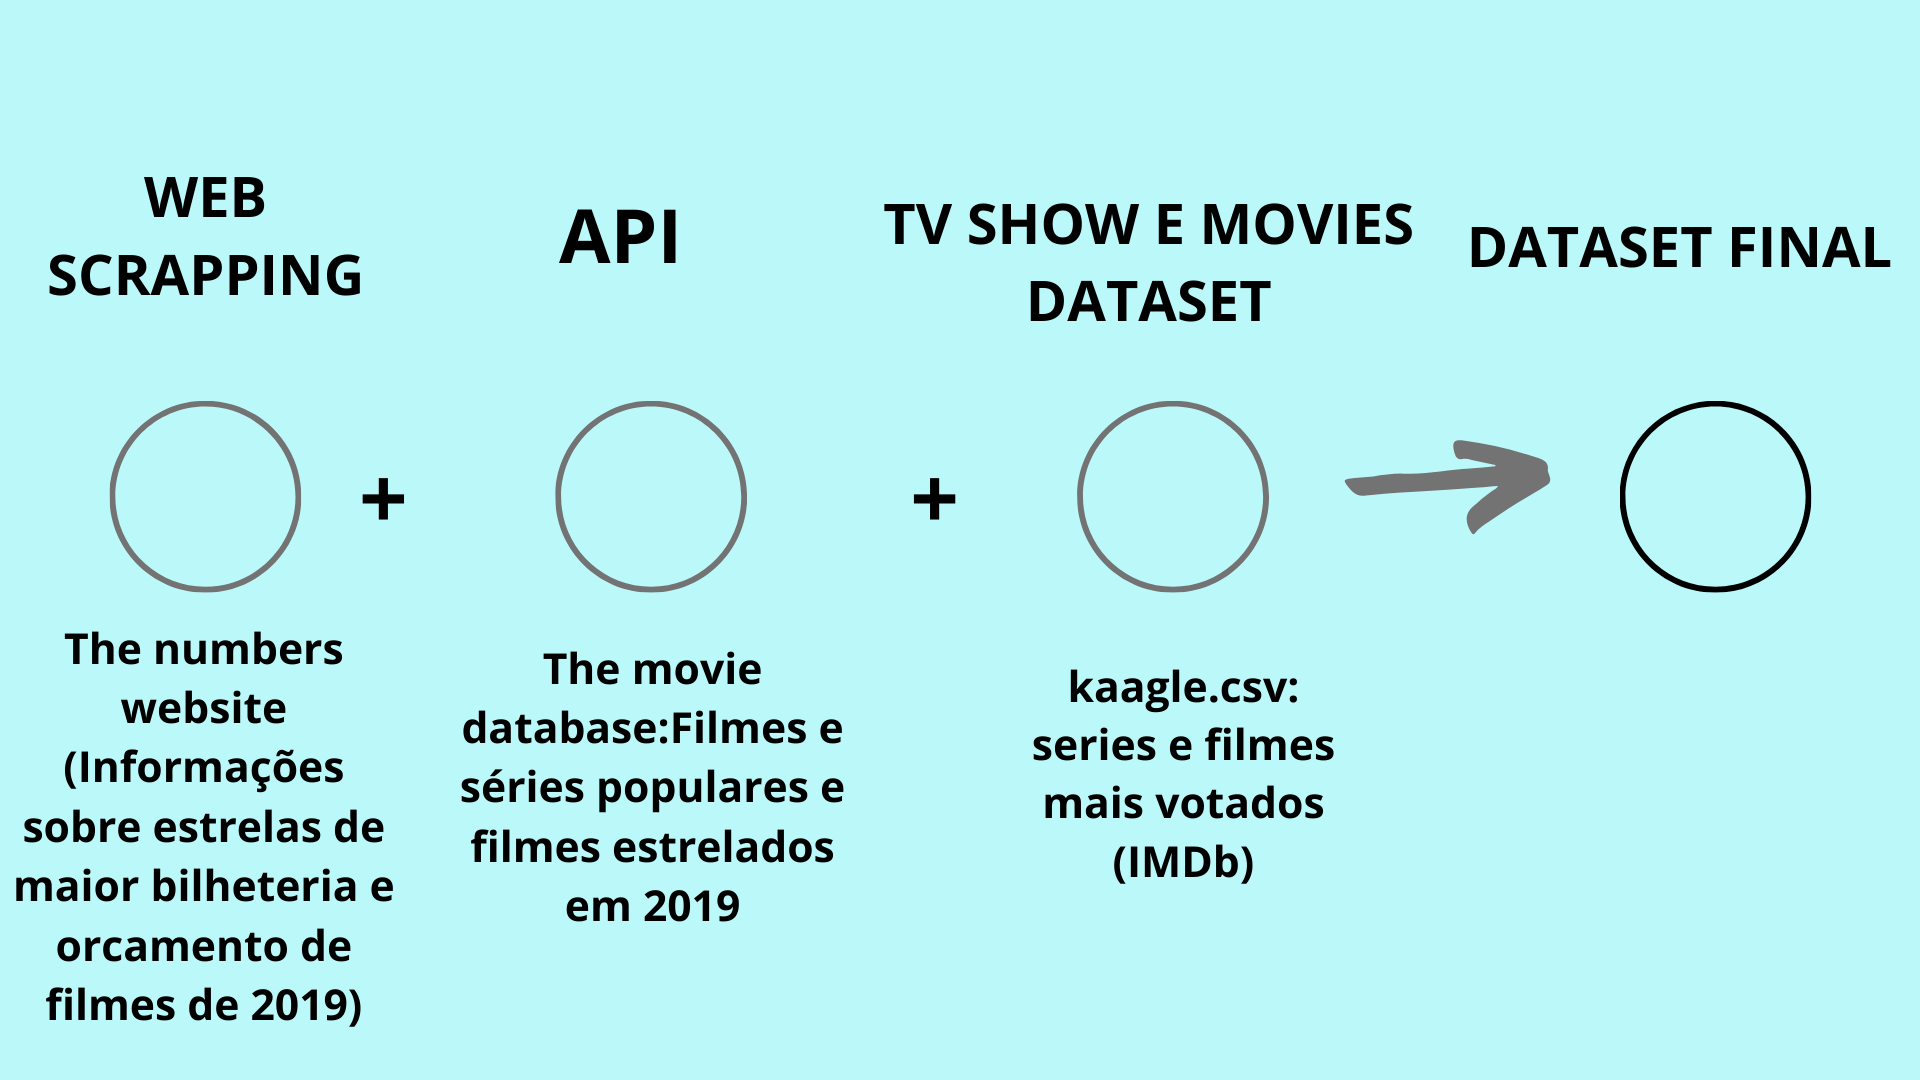

In [1]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(filename='/Users/Nagem/Documents/ironhack/projects/project_api_web/Web scraping.png')

# Web scape The numbers (1)

#os 20 filmes com maior bilheteria em 2019

In [2]:
url = 'https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/released-in-2020'

In [3]:
url

'https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/released-in-2020'

In [4]:
response = requests.get(url)
response

<Response [200]>

In [5]:
response.content

b'<!DOCTYPE html>\r\n<html xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml">\r\n<head>\r\n<!-- Global site tag (gtag.js) - Google Analytics -->\r\n<script async src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>\r\n<script>\r\n  window.dataLayer = window.dataLayer || [];\r\n  function gtag(){dataLayer.push(arguments);}\r\n  gtag(\'js\', new Date());\r\n\r\n  gtag(\'config\', \'UA-1343128-1\');\r\n</script>\r\n<meta http-equiv="PICS-Label" content=\'(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))\'>\r\n<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n<meta name="format-detection" content="telephone=no">   <!-- for apple mobile --> \r\n<meta property="fb:admi

In [6]:
html1 = response.content
html1

b'<!DOCTYPE html>\r\n<html xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml">\r\n<head>\r\n<!-- Global site tag (gtag.js) - Google Analytics -->\r\n<script async src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>\r\n<script>\r\n  window.dataLayer = window.dataLayer || [];\r\n  function gtag(){dataLayer.push(arguments);}\r\n  gtag(\'js\', new Date());\r\n\r\n  gtag(\'config\', \'UA-1343128-1\');\r\n</script>\r\n<meta http-equiv="PICS-Label" content=\'(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))\'>\r\n<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n<meta name="format-detection" content="telephone=no">   <!-- for apple mobile --> \r\n<meta property="fb:admi

In [7]:
soup = BeautifulSoup(html1)
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
</script>
<meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
<meta content="521546213" property="fb:admins"/>
<meta content="initial-scale=

In [8]:
table = soup.find('tbody').find_all('td')
table

[<td class="data">1</td>,
 <td><b><a href="/movie/Bad-Boys-For-Life-(Bad-Boys-3)-(2020)#tab=summary">Bad Boys For Life</a></b></td>,
 <td align="right">$418,051,359</td>,
 <td align="right">$204,417,855</td>,
 <td align="right">$213,633,504</td>,
 <td align="right">48.90%</td>,
 <td class="data">2</td>,
 <td><b><a href="/movie/Sonic-The-Hedgehog-(Japan)-(2020)#tab=summary">Sonic The Hedgehog</a></b></td>,
 <td align="right">$306,024,225</td>,
 <td align="right">$146,066,470</td>,
 <td align="right">$159,957,755</td>,
 <td align="right">47.73%</td>,
 <td class="data">3</td>,
 <td><b><a href="/movie/Dolittle#tab=summary">Dolittle</a></b></td>,
 <td align="right">$224,257,828</td>,
 <td align="right">$77,047,065</td>,
 <td align="right">$147,210,763</td>,
 <td align="right">34.36%</td>,
 <td class="data">4</td>,
 <td><b><a href="/movie/Birds-of-Prey-(And-the-Fantabulous-Emancipation-of-One-Harley-Quinn)-(2020)#tab=summary">Birds of Prey (And the Fantabulous Emancipation…</a></b></td>,
 <t

#Filmes e orcamentos

In [9]:
movies = soup.find('td', attrs={'class':'data'})
movies = [row.text for row in table]
movies

['1',
 'Bad Boys For Life',
 '$418,051,359',
 '$204,417,855',
 '$213,633,504',
 '48.90%',
 '2',
 'Sonic The Hedgehog',
 '$306,024,225',
 '$146,066,470',
 '$159,957,755',
 '47.73%',
 '3',
 'Dolittle',
 '$224,257,828',
 '$77,047,065',
 '$147,210,763',
 '34.36%',
 '4',
 'Birds of Prey (And the Fantabulous Emancipation…',
 '$201,717,463',
 '$84,158,461',
 '$117,559,002',
 '41.72%',
 '5',
 'The Invisible Man',
 '$127,911,471',
 '$64,914,050',
 '$62,997,421',
 '50.75%',
 '6',
 'The Call of the Wild',
 '$107,387,069',
 '$62,342,368',
 '$45,044,701',
 '58.05%',
 '7',
 'Onward',
 '$102,954,352',
 '$61,555,145',
 '$41,399,207',
 '59.79%',
 '8',
 'Tolo Tolo',
 '$50,520,263',
 '',
 '$50,520,263',
 '',
 '9',
 'Fantasy Island',
 '$47,544,753',
 '$26,441,782',
 '$21,102,971',
 '55.61%',
 '10',
 'Namsaneui Bujangdeul',
 '$34,956,967',
 '$113,527',
 '$34,843,440',
 '0.32%',
 '11',
 'Like a Boss',
 '$26,527,205',
 '$22,169,514',
 '$4,357,691',
 '83.57%',
 '12',
 'Emma.',
 '$25,421,139',
 '$10,055,355',


In [10]:
money = soup.find('tbody').find_all('tr')
money = [item.find_all('td', attrs={'align':'right'}) for item in money]
money[0]

[<td align="right">$418,051,359</td>,
 <td align="right">$204,417,855</td>,
 <td align="right">$213,633,504</td>,
 <td align="right">48.90%</td>]

In [11]:
new_list1=[]
for x in range(0, len(movies), 6):
    new_list1.append(movies[x: x+6])

In [12]:
print(new_list1)

[['1', 'Bad Boys For Life', '$418,051,359', '$204,417,855', '$213,633,504', '48.90%'], ['2', 'Sonic The Hedgehog', '$306,024,225', '$146,066,470', '$159,957,755', '47.73%'], ['3', 'Dolittle', '$224,257,828', '$77,047,065', '$147,210,763', '34.36%'], ['4', 'Birds of Prey (And the Fantabulous Emancipation…', '$201,717,463', '$84,158,461', '$117,559,002', '41.72%'], ['5', 'The Invisible Man', '$127,911,471', '$64,914,050', '$62,997,421', '50.75%'], ['6', 'The Call of the Wild', '$107,387,069', '$62,342,368', '$45,044,701', '58.05%'], ['7', 'Onward', '$102,954,352', '$61,555,145', '$41,399,207', '59.79%'], ['8', 'Tolo Tolo', '$50,520,263', '', '$50,520,263', ''], ['9', 'Fantasy Island', '$47,544,753', '$26,441,782', '$21,102,971', '55.61%'], ['10', 'Namsaneui Bujangdeul', '$34,956,967', '$113,527', '$34,843,440', '0.32%'], ['11', 'Like a Boss', '$26,527,205', '$22,169,514', '$4,357,691', '83.57%'], ['12', 'Emma.', '$25,421,139', '$10,055,355', '$15,365,784', '39.56%'], ['13', 'Lyod 2', '$2

In [13]:
df1 = pd.DataFrame(new_list1)
df1

,0,1,2,3,4,5
0,1,Bad Boys For Life,"$418,051,359","$204,417,855","$213,633,504",48.90%
1,2,Sonic The Hedgehog,"$306,024,225","$146,066,470","$159,957,755",47.73%
2,3,Dolittle,"$224,257,828","$77,047,065","$147,210,763",34.36%
3,4,Birds of Prey (And the Fantabulous Emancipation…,"$201,717,463","$84,158,461","$117,559,002",41.72%
4,5,The Invisible Man,"$127,911,471","$64,914,050","$62,997,421",50.75%
5,6,The Call of the Wild,"$107,387,069","$62,342,368","$45,044,701",58.05%
6,7,Onward,"$102,954,352","$61,555,145","$41,399,207",59.79%
7,8,Tolo Tolo,"$50,520,263",,"$50,520,263",
8,9,Fantasy Island,"$47,544,753","$26,441,782","$21,102,971",55.61%
9,10,Namsaneui Bujangdeul,"$34,956,967","$113,527","$34,843,440",0.32%


In [14]:
df1 = df1.loc[0:19,:]
df1

,0,1,2,3,4,5
0,1,Bad Boys For Life,"$418,051,359","$204,417,855","$213,633,504",48.90%
1,2,Sonic The Hedgehog,"$306,024,225","$146,066,470","$159,957,755",47.73%
2,3,Dolittle,"$224,257,828","$77,047,065","$147,210,763",34.36%
3,4,Birds of Prey (And the Fantabulous Emancipation…,"$201,717,463","$84,158,461","$117,559,002",41.72%
4,5,The Invisible Man,"$127,911,471","$64,914,050","$62,997,421",50.75%
5,6,The Call of the Wild,"$107,387,069","$62,342,368","$45,044,701",58.05%
6,7,Onward,"$102,954,352","$61,555,145","$41,399,207",59.79%
7,8,Tolo Tolo,"$50,520,263",,"$50,520,263",
8,9,Fantasy Island,"$47,544,753","$26,441,782","$21,102,971",55.61%
9,10,Namsaneui Bujangdeul,"$34,956,967","$113,527","$34,843,440",0.32%


In [15]:
df1 = df1.reset_index()
df1

,index,0,1,2,3,4,5
0,0,1,Bad Boys For Life,"$418,051,359","$204,417,855","$213,633,504",48.90%
1,1,2,Sonic The Hedgehog,"$306,024,225","$146,066,470","$159,957,755",47.73%
2,2,3,Dolittle,"$224,257,828","$77,047,065","$147,210,763",34.36%
3,3,4,Birds of Prey (And the Fantabulous Emancipation…,"$201,717,463","$84,158,461","$117,559,002",41.72%
4,4,5,The Invisible Man,"$127,911,471","$64,914,050","$62,997,421",50.75%
5,5,6,The Call of the Wild,"$107,387,069","$62,342,368","$45,044,701",58.05%
6,6,7,Onward,"$102,954,352","$61,555,145","$41,399,207",59.79%
7,7,8,Tolo Tolo,"$50,520,263",,"$50,520,263",
8,8,9,Fantasy Island,"$47,544,753","$26,441,782","$21,102,971",55.61%
9,9,10,Namsaneui Bujangdeul,"$34,956,967","$113,527","$34,843,440",0.32%


In [16]:
columns = ['Index','Rank', 'Movie', 'Worldwide Box ', 'Domestic Box ', 'International Box ', 'Domestic Share']

In [17]:
df1.columns = columns 
df1.drop(columns=['Index'], inplace=True)
df1

,Rank,Movie,Worldwide Box,Domestic Box,International Box,Domestic Share
0,1,Bad Boys For Life,"$418,051,359","$204,417,855","$213,633,504",48.90%
1,2,Sonic The Hedgehog,"$306,024,225","$146,066,470","$159,957,755",47.73%
2,3,Dolittle,"$224,257,828","$77,047,065","$147,210,763",34.36%
3,4,Birds of Prey (And the Fantabulous Emancipation…,"$201,717,463","$84,158,461","$117,559,002",41.72%
4,5,The Invisible Man,"$127,911,471","$64,914,050","$62,997,421",50.75%
5,6,The Call of the Wild,"$107,387,069","$62,342,368","$45,044,701",58.05%
6,7,Onward,"$102,954,352","$61,555,145","$41,399,207",59.79%
7,8,Tolo Tolo,"$50,520,263",,"$50,520,263",
8,9,Fantasy Island,"$47,544,753","$26,441,782","$21,102,971",55.61%
9,10,Namsaneui Bujangdeul,"$34,956,967","$113,527","$34,843,440",0.32%


# Web  scape The numbers (2)

#os 20 atores mais bem pagos em 2019

In [18]:
url = 'https://www.the-numbers.com/box-office-star-records/worldwide/yearly-acting/highest-grossing-2019-stars'

In [19]:
url

'https://www.the-numbers.com/box-office-star-records/worldwide/yearly-acting/highest-grossing-2019-stars'

In [20]:
response = requests.get(url)
response

<Response [200]>

In [21]:
response.content

b'<!DOCTYPE html>\r\n<html xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml">\r\n<head>\r\n<!-- Global site tag (gtag.js) - Google Analytics -->\r\n<script async src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>\r\n<script>\r\n  window.dataLayer = window.dataLayer || [];\r\n  function gtag(){dataLayer.push(arguments);}\r\n  gtag(\'js\', new Date());\r\n\r\n  gtag(\'config\', \'UA-1343128-1\');\r\n</script>\r\n<meta http-equiv="PICS-Label" content=\'(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))\'>\r\n<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n<meta name="format-detection" content="telephone=no">   <!-- for apple mobile --> \r\n<meta property="fb:admi

In [22]:
html = response.content
html

b'<!DOCTYPE html>\r\n<html xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml">\r\n<head>\r\n<!-- Global site tag (gtag.js) - Google Analytics -->\r\n<script async src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>\r\n<script>\r\n  window.dataLayer = window.dataLayer || [];\r\n  function gtag(){dataLayer.push(arguments);}\r\n  gtag(\'js\', new Date());\r\n\r\n  gtag(\'config\', \'UA-1343128-1\');\r\n</script>\r\n<meta http-equiv="PICS-Label" content=\'(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))\'>\r\n<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n<meta name="format-detection" content="telephone=no">   <!-- for apple mobile --> \r\n<meta property="fb:admi

In [23]:
soup = BeautifulSoup(html, 'lxml')
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
</script>
<meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
<meta content="521546213" property="fb:admins"/>
<meta content="initial-scale=

In [24]:
table = soup.find('tbody').find_all('td')
table

[<td class="data">1</td>,
 <td><b><a href="/person/72720401-Dwayne-Johnson">Dwayne Johnson</a></b></td>,
 <td align="right">570</td>,
 <td align="right">7</td>,
 <td align="right">1.1</td>,
 <td class="data">2</td>,
 <td><b><a href="/person/670401-Samuel-L-Jackson">Samuel L. Jackson</a></b></td>,
 <td align="right">490</td>,
 <td align="right">6</td>,
 <td align="right">6.3</td>,
 <td class="data">3</td>,
 <td><b><a href="/person/726510401-Karen-Gillan">Karen Gillan</a></b></td>,
 <td align="right">481</td>,
 <td align="right">5</td>,
 <td align="right">9.8</td>,
 <td class="data">4</td>,
 <td><b><a href="/person/116290401-Chris-Pratt">Chris Pratt</a></b></td>,
 <td align="right">392</td>,
 <td align="right">4</td>,
 <td align="right">10.3</td>,
 <td class="data">5</td>,
 <td><b><a href="/person/185380401-Tom-Holland">Tom Holland</a></b></td>,
 <td align="right">391</td>,
 <td align="right">4</td>,
 <td align="right">7.3</td>,
 <td class="data">6</td>,
 <td><b><a href="/person/64300401

In [25]:
names = soup.find('td', attrs={'class':'data'})
names = [item.text for item in table]
names


['1',
 'Dwayne Johnson',
 '570',
 '7',
 '1.1',
 '2',
 'Samuel L. Jackson',
 '490',
 '6',
 '6.3',
 '3',
 'Karen Gillan',
 '481',
 '5',
 '9.8',
 '4',
 'Chris Pratt',
 '392',
 '4',
 '10.3',
 '5',
 'Tom Holland',
 '391',
 '4',
 '7.3',
 '6',
 'Chris Hemsworth',
 '361',
 '4',
 '2.0',
 '7',
 'Dave Bautista',
 '359',
 '4',
 '11.5',
 '8',
 'Danai Gurira',
 '299',
 '3',
 '9.7',
 '9',
 'Chadwick Boseman',
 '299',
 '3',
 '14.0',
 '10',
 'Letitia Wright',
 '299',
 '3',
 '17.0',
 '11',
 'Robert Downey, Jr.',
 '295',
 '3',
 '3.3',
 '12',
 'Josh Brolin',
 '295',
 '4',
 '8.8',
 '13',
 'Zoe Saldana',
 '294',
 '3',
 '16.7',
 '14',
 'Pom Klementieff',
 '294',
 '3',
 '20.3',
 '15',
 'Mark Ruffalo',
 '293',
 '3',
 '4.7',
 '16',
 'Brie Larson',
 '281',
 '3',
 '4.7',
 '17',
 'Woody Harrelson',
 '278',
 '5',
 '3.0',
 '18',
 'Tom Hiddleston',
 '277',
 '3',
 '9.3',
 '19',
 'Paul Bettany',
 '277',
 '3',
 '15.0',
 '20',
 'Jason Statham',
 '274',
 '3',
 '2.0',
 '21',
 'Chris Evans',
 '272',
 '3',
 '2.7',
 '22',
 'V

In [26]:
x = soup.find('tbody').find_all('tr')
x = [item.find_all('td', attrs={'align':"right"}) for item in x]
x

[[<td align="right">570</td>,
  <td align="right">7</td>,
  <td align="right">1.1</td>],
 [<td align="right">490</td>,
  <td align="right">6</td>,
  <td align="right">6.3</td>],
 [<td align="right">481</td>,
  <td align="right">5</td>,
  <td align="right">9.8</td>],
 [<td align="right">392</td>,
  <td align="right">4</td>,
  <td align="right">10.3</td>],
 [<td align="right">391</td>,
  <td align="right">4</td>,
  <td align="right">7.3</td>],
 [<td align="right">361</td>,
  <td align="right">4</td>,
  <td align="right">2.0</td>],
 [<td align="right">359</td>,
  <td align="right">4</td>,
  <td align="right">11.5</td>],
 [<td align="right">299</td>,
  <td align="right">3</td>,
  <td align="right">9.7</td>],
 [<td align="right">299</td>,
  <td align="right">3</td>,
  <td align="right">14.0</td>],
 [<td align="right">299</td>,
  <td align="right">3</td>,
  <td align="right">17.0</td>],
 [<td align="right">295</td>,
  <td align="right">3</td>,
  <td align="right">3.3</td>],
 [<td align="righ

In [28]:
#x[0][0].text

In [27]:
new_list_x= []

for i in range(0, len(names), 5):
    #print(i[0].text)
    new_list_x.append(names[i: i+5])

In [28]:
print(new_list_x)

[['1', 'Dwayne Johnson', '570', '7', '1.1'], ['2', 'Samuel L. Jackson', '490', '6', '6.3'], ['3', 'Karen Gillan', '481', '5', '9.8'], ['4', 'Chris Pratt', '392', '4', '10.3'], ['5', 'Tom Holland', '391', '4', '7.3'], ['6', 'Chris Hemsworth', '361', '4', '2.0'], ['7', 'Dave Bautista', '359', '4', '11.5'], ['8', 'Danai Gurira', '299', '3', '9.7'], ['9', 'Chadwick Boseman', '299', '3', '14.0'], ['10', 'Letitia Wright', '299', '3', '17.0'], ['11', 'Robert Downey, Jr.', '295', '3', '3.3'], ['12', 'Josh Brolin', '295', '4', '8.8'], ['13', 'Zoe Saldana', '294', '3', '16.7'], ['14', 'Pom Klementieff', '294', '3', '20.3'], ['15', 'Mark Ruffalo', '293', '3', '4.7'], ['16', 'Brie Larson', '281', '3', '4.7'], ['17', 'Woody Harrelson', '278', '5', '3.0'], ['18', 'Tom Hiddleston', '277', '3', '9.3'], ['19', 'Paul Bettany', '277', '3', '15.0'], ['20', 'Jason Statham', '274', '3', '2.0'], ['21', 'Chris Evans', '272', '3', '2.7'], ['22', 'Vin Diesel', '272', '3', '9.3'], ['23', 'Zendaya', '271', '3', '

In [31]:
#x[0][1].text

In [14]:
#new_list_2 =[]
#for i in x:
    #print(i[0].text)
    #new_list_2.append(i[1].text)

In [16]:
#x[0][2].text

'1.1'

In [17]:
#new_list_3=[]
#for i in x:
    #new_list_3.append(i[2].text)

In [29]:
df = pd.DataFrame(new_list_x)
df

,0,1,2,3,4
0,1,Dwayne Johnson,570,7,1.1
1,2,Samuel L. Jackson,490,6,6.3
2,3,Karen Gillan,481,5,9.8
3,4,Chris Pratt,392,4,10.3
4,5,Tom Holland,391,4,7.3
...,...,...,...,...,...
95,96,Hailee Steinfeld,133,2,2.0
96,97,Donnie Yen,131,2,1.5
97,98,Zac Efron,129,2,2.0
98,99,Talitha Bateman,127,2,8.5


In [30]:
df = df.reset_index()
df

,index,0,1,2,3,4
0,0,1,Dwayne Johnson,570,7,1.1
1,1,2,Samuel L. Jackson,490,6,6.3
2,2,3,Karen Gillan,481,5,9.8
3,3,4,Chris Pratt,392,4,10.3
4,4,5,Tom Holland,391,4,7.3
...,...,...,...,...,...,...
95,95,96,Hailee Steinfeld,133,2,2.0
96,96,97,Donnie Yen,131,2,1.5
97,97,98,Zac Efron,129,2,2.0
98,98,99,Talitha Bateman,127,2,8.5


In [31]:
columns =['Index','Rank','Name','Star Score', 'Movies', 'Average Billing']

In [32]:
df.columns = columns
df.drop(columns=['Index'], inplace=True)
df


,Rank,Name,Star Score,Movies,Average Billing
0,1,Dwayne Johnson,570,7,1.1
1,2,Samuel L. Jackson,490,6,6.3
2,3,Karen Gillan,481,5,9.8
3,4,Chris Pratt,392,4,10.3
4,5,Tom Holland,391,4,7.3
...,...,...,...,...,...
95,96,Hailee Steinfeld,133,2,2.0
96,97,Donnie Yen,131,2,1.5
97,98,Zac Efron,129,2,2.0
98,99,Talitha Bateman,127,2,8.5


In [36]:
df= df.loc[1:19,:]
df

,Rank,Name,Star Score,Movies,Average Billing
1,2,Samuel L. Jackson,490,6,6.3
2,3,Karen Gillan,481,5,9.8
3,4,Chris Pratt,392,4,10.3
4,5,Tom Holland,391,4,7.3
5,6,Chris Hemsworth,361,4,2.0
6,7,Dave Bautista,359,4,11.5
7,8,Danai Gurira,299,3,9.7
8,9,Chadwick Boseman,299,3,14.0
9,10,Letitia Wright,299,3,17.0
10,11,"Robert Downey, Jr.",295,3,3.3


# THE MOVIE DATABASE - API

In [82]:
!pip install tmdbv3api

In [33]:
#####APIII
from tmdbv3api import TMDb
tmdb = TMDb()
tmdb.api_key = '31961ad6718f1106dac2469fa9117b12'

# ABOUT MOVIES

#MOVIE POPULAR

In [34]:
from tmdbv3api import Movie


In [35]:
movie = Movie()
popular_movie = movie.popular()

for p in popular_movie:
    print(p.id)
    print(p.title)
    print(p.overview)
    print(p.poster_path)
    

419704
Ad Astra
The near future, a time when both hope and hardships drive humanity to look to the stars and beyond. While a mysterious phenomenon menaces to destroy life on planet Earth, astronaut Roy McBride undertakes a mission across the immensity of space and its many perils to uncover the truth about a lost expedition that decades before boldly faced emptiness and silence in search of the unknown.
/xBHvZcjRiWyobQ9kxBhO6B2dtRI.jpg
475430
Artemis Fowl
Artemis Fowl is a 12-year-old genius and descendant of a long line of criminal masterminds. He soon finds himself in an epic battle against a race of powerful underground fairies who may be behind his father's disappearance.
/tI8ocADh22GtQFV28vGHaBZVb0U.jpg
454626
Sonic the Hedgehog
Based on the global blockbuster videogame franchise from Sega, Sonic the Hedgehog tells the story of the world’s speediest hedgehog as he embraces his new home on Earth. In this live-action adventure comedy, Sonic and his new best friend team up to defend 

In [36]:
popular_movie

[Ad Astra,
 Artemis Fowl,
 Sonic the Hedgehog,
 Irresistible,
 Eurovision Song Contest: The Story of Fire Saga,
 Parasite,
 Lost Bullet,
 The Invisible Man,
 Star Wars: The Rise of Skywalker,
 Force of Nature,
 Avengers: Infinity War,
 The Gentlemen,
 Joker,
 Feel the Beat,
 1917,
 Aladdin,
 7500,
 Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn),
 Britt-Marie Was Here,
 Terminator: Dark Fate]

# less movies

In [37]:
from tmdbv3api import Discover

In [38]:
discover = Discover()
less_popular = discover.discover_movies({
    'sort_by':'popularity.asc'
})

In [39]:
less_popular

[Η ζωή ενάμιση χιλιάρικο,
 Eathie,
 A Nun's Curse,
 Inka Bola,
 Birdie's Dilemma,
 Strolling Through the Meadows,
 Os Filhos da Noite,
 Hedgeog,
 Natir Puja,
 When? An Extract from Further than the Furthest Thing,
 The New Alchemists,
 Η ζωή αρχίζει στα σαράντα,
 Qanun,
 Η βασίλισσα της ρέγγας,
 EVE,
 Η τραπεζίτισσα της Black Bank,
 Η σταρ και ο κλέφτης,
 Valérie Blais - Premier one-woman show,
 Η σκλάβα,
 Η ροζ κόττα]

In [40]:
discover = Discover()
rated_movie = discover.discover_movies({
    'sort_by':'rating.descending',
    'page':'1',
})

In [41]:
rated_movie

[Home of the Brave,
 Crusty Demons Collection,
 Le Titanic redévoilé,
 I'm Actually Laughing: Chapo Trap House, Election Night 2016,
 Chapo Trap House: Good Vibes at the Iowa State Fair,
 Diary of an E-Celeb,
 Blacklisted,
 An Inconvenient Goof,
 Heights or A Bisexual Woman's Existential Musings on Los Angeles,
 Killer in a Red Dress,
 Into the Dark Collection,
 Alpha Brain,
 The Sargonian Effect,
 The Covington Kids True Story,
 The Fang in the Hole,
 Wild Raghda]

In [42]:
discover = Discover()
movie_premiere_2019 = discover.discover_movies({
            'primary_release_year': '2019',
            'page': '1',
            'vote_average.gte': '8'
        })

In [43]:
movie_premiere_2019

[Parasite,
 Joker,
 Five Feet Apart,
 Avengers: Endgame,
 Jojo Rabbit,
 Portrait of a Lady on Fire,
 Weathering with You,
 How to Train Your Dragon: Homecoming,
 Togo,
 National Theatre Live: A Midsummer Night's Dream,
 Klaus,
 Steven Universe: The Movie,
 My Hero Academia: Heroes Rising,
 Bacurau,
 Miracle in Cell No. 7,
 KonoSuba: God's Blessing on this Wonderful World! Legend of Crimson,
 Violet Evergarden: Eternity and the Auto Memory Doll,
 Apollo 11,
 System Crasher,
 The Art of Racing in the Rain]

# Get the primary information about a movie.

In [44]:
m = movie.details(419704)

print(m.title)
print(m.overview)
print(m.popularity)

Ad Astra
The near future, a time when both hope and hardships drive humanity to look to the stars and beyond. While a mysterious phenomenon menaces to destroy life on planet Earth, astronaut Roy McBride undertakes a mission across the immensity of space and its many perils to uncover the truth about a lost expedition that decades before boldly faced emptiness and silence in search of the unknown.
300.628


# Search for movies by title

In [45]:
search = movie.search('Star Wars: The Rise of Skywalker')

len(search)
search[1]
    #for res in search:
    #print(res.id)
    #print(res.title)
    #print(res.overview)
    #print(res.poster_path)
    #print(res.vote_average)

Star Wars: Episode IX - The Rise of Skywalker: Anti-Cringe-Cut

In [46]:
#GENERO
from tmdbv3api import TMDb, Genre
genre_movie = Genre()

genres_movie = genre_movie.movie_list()
genres_movie



[Action,
 Adventure,
 Animation,
 Comedy,
 Crime,
 Documentary,
 Drama,
 Family,
 Fantasy,
 History,
 Horror,
 Music,
 Mystery,
 Romance,
 Science Fiction,
 TV Movie,
 Thriller,
 War,
 Western]

# SÉRIES POPULAR

In [47]:
from tmdbv3api import TV
tv = TV()
series_popular = tv.popular()

for result in series_popular:
    print(result.name)
    print(result.overview)
    


Dark
A missing child causes four families to help each other for answers. What they could not imagine is that this mystery would be connected to innumerable other secrets of the small town.
Law & Order: Special Victims Unit
In the criminal justice system, sexually-based offenses are considered especially heinous. In New York City, the dedicated detectives who investigate these vicious felonies are members of an elite squad known as the Special Victims Unit. These are their stories.
Friends
The misadventures of a group of friends as they navigate the pitfalls of work, life and love in Manhattan.
The Flash
After a particle accelerator causes a freak storm, CSI Investigator Barry Allen is struck by lightning and falls into a coma. Months later he awakens with the power of super speed, granting him the ability to move through Central City like an unseen guardian angel. Though initially excited by his newfound powers, Barry is shocked to discover he is not the only "meta-human" who was crea

In [48]:
series_popular

[Dark,
 Law & Order: Special Victims Unit,
 Friends,
 The Flash,
 The Simpsons,
 Supernatural,
 Family Guy,
 Pokémon,
 Grey's Anatomy,
 American Dad!,
 The 100,
 NCIS,
 Arrow,
 Rick and Morty,
 Doctor Who,
 CSI: Crime Scene Investigation,
 Game of Thrones,
 The Blacklist,
 Marvel's Agents of S.H.I.E.L.D.,
 Two and a Half Men]

In [49]:
# What are the best dramas?
discover = Discover()
best_drama = discover.discover_tv_shows({
    'sort_by': 'popular.desc',
    'country' : 'brazil',
    'User score':10,
    'where to wach':'Netflix'
})

In [50]:
best_drama

[Yo Sé Que Mentía,
 Young Talent Time,
 Secret Talents of the Stars,
 Quarterlife,
 Gag Concert,
 Star Golden Bell,
 X-Man,
 Happy Sunday,
 Happy Together,
 We Are Dating Now,
 One Fine Day,
 Golden Faith,
 Girls Behaving Badly,
 Fingerbobs,
 The Lone Gunmen,
 Spring Waltz,
 Hur Jun,
 Seoul 1945,
 Mirmo  Zibang!,
 The Secret Life Of...]

In [51]:
best_drama_an = discover.discover_tv_shows({
    'with_genres': 18,
    'sort_by': 'vote_average.desc',
    'vote_count.gte': 10
})

In [52]:
from tmdbv3api import Person
person = Person()
p = person.details(5)

print(p.name)
print(p.biography)

Peter Cushing
Peter Wilton Cushing, OBE  (26 May 1913 – 11 August 1994) was an English actor, known for his many appearances in Hammer Films, in which he played Baron Frankenstein and Dr. Van Helsing, amongst many other roles, often appearing opposite Christopher Lee, and occasionally Vincent Price. A familiar face on both sides of the Atlantic, his most famous roles outside of "Hammer Horror" include his many appearances as Sherlock Holmes, as Grand Moff Tarkin in Star Wars (1977) and as the mysterious Doctor Who in Doctor Who and the Daleks and Daleks - Invasion Earth 2150 AD in 1965 and 1966, two cinema films based on the television series Doctor Who.

Description above from the Wikipedia article Peter Cushing, licensed under CC-BY-SA, full list of contributors on Wikipedia.


In [53]:
data = list(zip(popular_movie,less_popular,movie_premiere_2019,series_popular))
data

[(Ad Astra, Η ζωή ενάμιση χιλιάρικο, Parasite, Dark),
 (Artemis Fowl, Eathie, Joker, Law & Order: Special Victims Unit),
 (Sonic the Hedgehog, A Nun's Curse, Five Feet Apart, Friends),
 (Irresistible, Inka Bola, Avengers: Endgame, The Flash),
 (Eurovision Song Contest: The Story of Fire Saga,
  Birdie's Dilemma,
  Jojo Rabbit,
  The Simpsons),
 (Parasite,
  Strolling Through the Meadows,
  Portrait of a Lady on Fire,
  Supernatural),
 (Lost Bullet, Os Filhos da Noite, Weathering with You, Family Guy),
 (The Invisible Man, Hedgeog, How to Train Your Dragon: Homecoming, Pokémon),
 (Star Wars: The Rise of Skywalker, Natir Puja, Togo, Grey's Anatomy),
 (Force of Nature,
  When? An Extract from Further than the Furthest Thing,
  National Theatre Live: A Midsummer Night's Dream,
  American Dad!),
 (Avengers: Infinity War, The New Alchemists, Klaus, The 100),
 (The Gentlemen, Η ζωή αρχίζει στα σαράντα, Steven Universe: The Movie, NCIS),
 (Joker, Qanun, My Hero Academia: Heroes Rising, Arrow),

In [54]:
tmdb= []

for i in data:
    #print(i[0].text)
    tmdb.append(i)
    

In [55]:
print(tmdb)

[(Ad Astra, Η ζωή ενάμιση χιλιάρικο, Parasite, Dark), (Artemis Fowl, Eathie, Joker, Law & Order: Special Victims Unit), (Sonic the Hedgehog, A Nun's Curse, Five Feet Apart, Friends), (Irresistible, Inka Bola, Avengers: Endgame, The Flash), (Eurovision Song Contest: The Story of Fire Saga, Birdie's Dilemma, Jojo Rabbit, The Simpsons), (Parasite, Strolling Through the Meadows, Portrait of a Lady on Fire, Supernatural), (Lost Bullet, Os Filhos da Noite, Weathering with You, Family Guy), (The Invisible Man, Hedgeog, How to Train Your Dragon: Homecoming, Pokémon), (Star Wars: The Rise of Skywalker, Natir Puja, Togo, Grey's Anatomy), (Force of Nature, When? An Extract from Further than the Furthest Thing, National Theatre Live: A Midsummer Night's Dream, American Dad!), (Avengers: Infinity War, The New Alchemists, Klaus, The 100), (The Gentlemen, Η ζωή αρχίζει στα σαράντα, Steven Universe: The Movie, NCIS), (Joker, Qanun, My Hero Academia: Heroes Rising, Arrow), (Feel the Beat, Η βασίλισσα τ

In [56]:
df0 = pd.DataFrame(tmdb)
df0

,0,1,2,3
0,Ad Astra,Η ζωή ενάμιση χιλιάρικο,Parasite,Dark
1,Artemis Fowl,Eathie,Joker,Law & Order: Special Victims Unit
2,Sonic the Hedgehog,A Nun's Curse,Five Feet Apart,Friends
3,Irresistible,Inka Bola,Avengers: Endgame,The Flash
4,Eurovision Song Contest: The Story of Fire Saga,Birdie's Dilemma,Jojo Rabbit,The Simpsons
5,Parasite,Strolling Through the Meadows,Portrait of a Lady on Fire,Supernatural
6,Lost Bullet,Os Filhos da Noite,Weathering with You,Family Guy
7,The Invisible Man,Hedgeog,How to Train Your Dragon: Homecoming,Pokémon
8,Star Wars: The Rise of Skywalker,Natir Puja,Togo,Grey's Anatomy
9,Force of Nature,When? An Extract from Further than the Furthes...,National Theatre Live: A Midsummer Night's Dream,American Dad!


In [57]:
df0 = df0.reset_index()
df0

,index,0,1,2,3
0,0,Ad Astra,Η ζωή ενάμιση χιλιάρικο,Parasite,Dark
1,1,Artemis Fowl,Eathie,Joker,Law & Order: Special Victims Unit
2,2,Sonic the Hedgehog,A Nun's Curse,Five Feet Apart,Friends
3,3,Irresistible,Inka Bola,Avengers: Endgame,The Flash
4,4,Eurovision Song Contest: The Story of Fire Saga,Birdie's Dilemma,Jojo Rabbit,The Simpsons
5,5,Parasite,Strolling Through the Meadows,Portrait of a Lady on Fire,Supernatural
6,6,Lost Bullet,Os Filhos da Noite,Weathering with You,Family Guy
7,7,The Invisible Man,Hedgeog,How to Train Your Dragon: Homecoming,Pokémon
8,8,Star Wars: The Rise of Skywalker,Natir Puja,Togo,Grey's Anatomy
9,9,Force of Nature,When? An Extract from Further than the Furthes...,National Theatre Live: A Midsummer Night's Dream,American Dad!


In [58]:
columns=['id','Popular Movie','No popular movie','Premied 2019','Series Popular']

In [59]:
df0.columns = columns
df0.drop(columns=['id'], inplace=True)
df0


,Popular Movie,No popular movie,Premied 2019,Series Popular
0,Ad Astra,Η ζωή ενάμιση χιλιάρικο,Parasite,Dark
1,Artemis Fowl,Eathie,Joker,Law & Order: Special Victims Unit
2,Sonic the Hedgehog,A Nun's Curse,Five Feet Apart,Friends
3,Irresistible,Inka Bola,Avengers: Endgame,The Flash
4,Eurovision Song Contest: The Story of Fire Saga,Birdie's Dilemma,Jojo Rabbit,The Simpsons
5,Parasite,Strolling Through the Meadows,Portrait of a Lady on Fire,Supernatural
6,Lost Bullet,Os Filhos da Noite,Weathering with You,Family Guy
7,The Invisible Man,Hedgeog,How to Train Your Dragon: Homecoming,Pokémon
8,Star Wars: The Rise of Skywalker,Natir Puja,Togo,Grey's Anatomy
9,Force of Nature,When? An Extract from Further than the Furthes...,National Theatre Live: A Midsummer Night's Dream,American Dad!


In [60]:
df0 = df0.loc[0:18,:]
df0

,Popular Movie,No popular movie,Premied 2019,Series Popular
0,Ad Astra,Η ζωή ενάμιση χιλιάρικο,Parasite,Dark
1,Artemis Fowl,Eathie,Joker,Law & Order: Special Victims Unit
2,Sonic the Hedgehog,A Nun's Curse,Five Feet Apart,Friends
3,Irresistible,Inka Bola,Avengers: Endgame,The Flash
4,Eurovision Song Contest: The Story of Fire Saga,Birdie's Dilemma,Jojo Rabbit,The Simpsons
5,Parasite,Strolling Through the Meadows,Portrait of a Lady on Fire,Supernatural
6,Lost Bullet,Os Filhos da Noite,Weathering with You,Family Guy
7,The Invisible Man,Hedgeog,How to Train Your Dragon: Homecoming,Pokémon
8,Star Wars: The Rise of Skywalker,Natir Puja,Togo,Grey's Anatomy
9,Force of Nature,When? An Extract from Further than the Furthes...,National Theatre Live: A Midsummer Night's Dream,American Dad!


# Concat three datasets (Web1 +Web2+ API(TMDb)= df + df0 DB

In [61]:
data = pd.concat([df,df0,df1], axis=1, join='inner')
data

,Rank,Name,Star Score,Movies,Average Billing,Popular Movie,No popular movie,Premied 2019,Series Popular,Rank,Movie,Worldwide Box,Domestic Box,International Box,Domestic Share
0,1,Dwayne Johnson,570,7,1.1,Ad Astra,Η ζωή ενάμιση χιλιάρικο,Parasite,Dark,1,Bad Boys For Life,"$418,051,359","$204,417,855","$213,633,504",48.90%
1,2,Samuel L. Jackson,490,6,6.3,Artemis Fowl,Eathie,Joker,Law & Order: Special Victims Unit,2,Sonic The Hedgehog,"$306,024,225","$146,066,470","$159,957,755",47.73%
2,3,Karen Gillan,481,5,9.8,Sonic the Hedgehog,A Nun's Curse,Five Feet Apart,Friends,3,Dolittle,"$224,257,828","$77,047,065","$147,210,763",34.36%
3,4,Chris Pratt,392,4,10.3,Irresistible,Inka Bola,Avengers: Endgame,The Flash,4,Birds of Prey (And the Fantabulous Emancipation…,"$201,717,463","$84,158,461","$117,559,002",41.72%
4,5,Tom Holland,391,4,7.3,Eurovision Song Contest: The Story of Fire Saga,Birdie's Dilemma,Jojo Rabbit,The Simpsons,5,The Invisible Man,"$127,911,471","$64,914,050","$62,997,421",50.75%
5,6,Chris Hemsworth,361,4,2.0,Parasite,Strolling Through the Meadows,Portrait of a Lady on Fire,Supernatural,6,The Call of the Wild,"$107,387,069","$62,342,368","$45,044,701",58.05%
6,7,Dave Bautista,359,4,11.5,Lost Bullet,Os Filhos da Noite,Weathering with You,Family Guy,7,Onward,"$102,954,352","$61,555,145","$41,399,207",59.79%
7,8,Danai Gurira,299,3,9.7,The Invisible Man,Hedgeog,How to Train Your Dragon: Homecoming,Pokémon,8,Tolo Tolo,"$50,520,263",,"$50,520,263",
8,9,Chadwick Boseman,299,3,14.0,Star Wars: The Rise of Skywalker,Natir Puja,Togo,Grey's Anatomy,9,Fantasy Island,"$47,544,753","$26,441,782","$21,102,971",55.61%
9,10,Letitia Wright,299,3,17.0,Force of Nature,When? An Extract from Further than the Furthes...,National Theatre Live: A Midsummer Night's Dream,American Dad!,10,Namsaneui Bujangdeul,"$34,956,967","$113,527","$34,843,440",0.32%


# USER OTHER DATAFRAME - CSV

In [62]:
!cd

C:\Users\Nagem\Documents\ironhack\projects\project_api_web


In [63]:
tv_shows = pd.read_csv('tv_shows.csv')
tv_shows

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [64]:
##retirando colunas desnecessarias
tv_shows.drop(['type', 'Unnamed: 0',], axis=1, inplace=True)
tv_shows

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0
2,Money Heist,2017,18+,8.4,91%,1,0,0,0
3,Sherlock,2010,16+,9.1,78%,1,0,0,0
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0
...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1
5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1


In [92]:
tv_shows =tv_shows.loc[0:19,:]
tv_shows

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0
2,Money Heist,2017,18+,8.4,91%,1,0,0,0
3,Sherlock,2010,16+,9.1,78%,1,0,0,0
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0
5,The Office,2005,16+,8.9,81%,1,0,0,0
6,Black Mirror,2011,18+,8.8,83%,1,0,0,0
7,Supernatural,2005,16+,8.4,93%,1,0,0,0
8,Peaky Blinders,2013,18+,8.8,92%,1,0,0,0
9,Avatar: The Last Airbender,2005,7+,9.2,100%,1,0,0,0


# Concat datasets (WEB1 e 2 + API+ CSV)= df + df0 + tv_shows (Data SET)

In [65]:
data_set = pd.concat([df,df0,df1, tv_shows], axis=1, join='inner')
data_set



,Rank,Name,Star Score,Movies,Average Billing,Popular Movie,No popular movie,Premied 2019,Series Popular,Rank,...,Domestic Share,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Dwayne Johnson,570,7,1.1,Ad Astra,Η ζωή ενάμιση χιλιάρικο,Parasite,Dark,1,...,48.90%,Breaking Bad,2008,18+,9.5,96%,1,0,0,0
1,2,Samuel L. Jackson,490,6,6.3,Artemis Fowl,Eathie,Joker,Law & Order: Special Victims Unit,2,...,47.73%,Stranger Things,2016,16+,8.8,93%,1,0,0,0
2,3,Karen Gillan,481,5,9.8,Sonic the Hedgehog,A Nun's Curse,Five Feet Apart,Friends,3,...,34.36%,Money Heist,2017,18+,8.4,91%,1,0,0,0
3,4,Chris Pratt,392,4,10.3,Irresistible,Inka Bola,Avengers: Endgame,The Flash,4,...,41.72%,Sherlock,2010,16+,9.1,78%,1,0,0,0
4,5,Tom Holland,391,4,7.3,Eurovision Song Contest: The Story of Fire Saga,Birdie's Dilemma,Jojo Rabbit,The Simpsons,5,...,50.75%,Better Call Saul,2015,18+,8.7,97%,1,0,0,0
5,6,Chris Hemsworth,361,4,2.0,Parasite,Strolling Through the Meadows,Portrait of a Lady on Fire,Supernatural,6,...,58.05%,The Office,2005,16+,8.9,81%,1,0,0,0
6,7,Dave Bautista,359,4,11.5,Lost Bullet,Os Filhos da Noite,Weathering with You,Family Guy,7,...,59.79%,Black Mirror,2011,18+,8.8,83%,1,0,0,0
7,8,Danai Gurira,299,3,9.7,The Invisible Man,Hedgeog,How to Train Your Dragon: Homecoming,Pokémon,8,...,,Supernatural,2005,16+,8.4,93%,1,0,0,0
8,9,Chadwick Boseman,299,3,14.0,Star Wars: The Rise of Skywalker,Natir Puja,Togo,Grey's Anatomy,9,...,55.61%,Peaky Blinders,2013,18+,8.8,92%,1,0,0,0
9,10,Letitia Wright,299,3,17.0,Force of Nature,When? An Extract from Further than the Furthes...,National Theatre Live: A Midsummer Night's Dream,American Dad!,10,...,0.32%,Avatar: The Last Airbender,2005,7+,9.2,100%,1,0,0,0


In [66]:
data_set=data_set.rename({'IMDb':'IMDb_title'}, axis=(1))
data_set

,Rank,Name,Star Score,Movies,Average Billing,Popular Movie,No popular movie,Premied 2019,Series Popular,Rank,...,Domestic Share,Title,Year,Age,IMDb_title,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Dwayne Johnson,570,7,1.1,Ad Astra,Η ζωή ενάμιση χιλιάρικο,Parasite,Dark,1,...,48.90%,Breaking Bad,2008,18+,9.5,96%,1,0,0,0
1,2,Samuel L. Jackson,490,6,6.3,Artemis Fowl,Eathie,Joker,Law & Order: Special Victims Unit,2,...,47.73%,Stranger Things,2016,16+,8.8,93%,1,0,0,0
2,3,Karen Gillan,481,5,9.8,Sonic the Hedgehog,A Nun's Curse,Five Feet Apart,Friends,3,...,34.36%,Money Heist,2017,18+,8.4,91%,1,0,0,0
3,4,Chris Pratt,392,4,10.3,Irresistible,Inka Bola,Avengers: Endgame,The Flash,4,...,41.72%,Sherlock,2010,16+,9.1,78%,1,0,0,0
4,5,Tom Holland,391,4,7.3,Eurovision Song Contest: The Story of Fire Saga,Birdie's Dilemma,Jojo Rabbit,The Simpsons,5,...,50.75%,Better Call Saul,2015,18+,8.7,97%,1,0,0,0
5,6,Chris Hemsworth,361,4,2.0,Parasite,Strolling Through the Meadows,Portrait of a Lady on Fire,Supernatural,6,...,58.05%,The Office,2005,16+,8.9,81%,1,0,0,0
6,7,Dave Bautista,359,4,11.5,Lost Bullet,Os Filhos da Noite,Weathering with You,Family Guy,7,...,59.79%,Black Mirror,2011,18+,8.8,83%,1,0,0,0
7,8,Danai Gurira,299,3,9.7,The Invisible Man,Hedgeog,How to Train Your Dragon: Homecoming,Pokémon,8,...,,Supernatural,2005,16+,8.4,93%,1,0,0,0
8,9,Chadwick Boseman,299,3,14.0,Star Wars: The Rise of Skywalker,Natir Puja,Togo,Grey's Anatomy,9,...,55.61%,Peaky Blinders,2013,18+,8.8,92%,1,0,0,0
9,10,Letitia Wright,299,3,17.0,Force of Nature,When? An Extract from Further than the Furthes...,National Theatre Live: A Midsummer Night's Dream,American Dad!,10,...,0.32%,Avatar: The Last Airbender,2005,7+,9.2,100%,1,0,0,0


In [67]:
import seaborn as sns
import sidetable
import matplotlib.pyplot as plt

In [68]:
data_set['IMDb_title'].describe()

count    19.000000
mean      8.752632
std       0.318623
min       8.200000
25%       8.550000
50%       8.800000
75%       8.850000
max       9.500000
Name: IMDb_title, dtype: float64

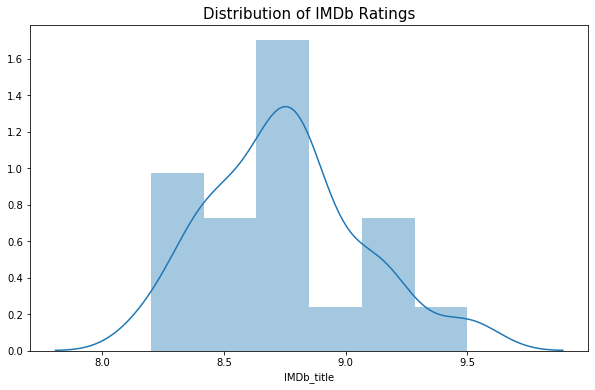

In [69]:
plt.figure(figsize=(10,6))
plt.title("Distribution of IMDb Ratings", fontsize=15)
sns.distplot(data_set['IMDb_title'])